<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793918_HelmyMoreno/blob/main/M%C3%B3dulo_3_Python_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%204/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# 
Modelo de desarrollo


## Objetivos


Después de completar este laboratorio, podrá:

* Desarrollar modelos de predicción


<p>En esta sección, desarrollaremos varios modelos que predecirán el precio del automóvil usando las variables o características. Esto es solo una estimación, pero debería darnos una idea objetiva de cuánto debería costar el automóvil.</p>


Algunas preguntas que queremos hacer en este módulo

<ul>
    <li>¿Sé si el distribuidor está ofreciendo un valor justo por mi intercambio?</li>
    <li>¿Sé si puse un valor justo en mi automóvil?</li>
</ul>
<p>En el análisis de datos, a menudo usamos <b>Desarrollo de modelos</b> para ayudarnos a predecir futuras observaciones a partir de los datos que tenemos.</p>

<p>Un modelo nos ayudará a comprender la relación exacta entre diferentes variables y cómo se utilizan estas variables para predecir el resultado.</p>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [71]:
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


#**1. Regresión lineal y regresión lineal múltiple**


#**Regresión lineal**


<p>Un ejemplo de un modelo de datos que usaremos es:</p>
<b>Regresión lineal simple</b>

<br>
<p>La regresión lineal simple es un método que nos ayuda a comprender la relación entre dos variables:</p>
<ul>
    <li>El predictor/variable independiente (X)</li>
    <li>La respuesta/variable dependiente (que queremos predecir)(Y)</li>
</ul>

<p>El resultado de la regresión lineal es una <b>función lineal</b> que predice la variable de respuesta (dependiente) en función de la variable predictora (independiente).</p>


$$
Y: Response \ Variable\\\\\\\\\\
X: Predictor \ Variables
$$


<b>Función lineal</b>
$$
Yhat = a + b  X
$$


<ul>
    <li>a se refiere a la <b>intersección</b> de la línea de regresión, en otras palabras: el valor de Y cuando X es 0</li>
    <li>b se refiere a la <b>pendiente</b> de la línea de regresión, en otras palabras: el valor con el que cambia Y cuando X aumenta en 1 unidad</li>
</ul>


<h4>Vamos a cargar los módulos para la regresión lineal:</h4>


In [8]:
from sklearn.linear_model import LinearRegression


<h4>Cree el objeto de Regresión Lineal:</h4>

In [9]:
lm = LinearRegression()
lm

LinearRegression()

<h4>¿Cómo podría "highway-mpg" ayudarnos a predecir el precio del automóvil?</h4>


Para este ejemplo, queremos ver cómo Highway-mpg puede ayudarnos a predecir el precio del automóvil.
Usando una regresión lineal simple, crearemos una función lineal con "Highway-mpg" como la variable predictora y el "price" como la variable de respuesta.


In [10]:
X = df[['highway-mpg']]
Y = df['price']


Ajuste el modelo lineal usando Highway-mpg

In [11]:
lm.fit(X,Y)

LinearRegression()

Podemos generar una predicción:


In [12]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])


<h4>¿Cuál es el valor del intercepto (a)?</h4>


In [13]:
lm.intercept_

38423.3058581574

<h4>¿Cuál es el valor de la pendiente (b)?</h4>

In [14]:
lm.coef_

array([-821.73337832])

<h3>¿Cuál es el modelo lineal estimado final que obtenemos?</h3>



Como vimos arriba, deberíamos obtener un modelo lineal final con la estructura:

$$
Yhat = a + b  X
$$



Conectando los valores reales obtenemos:


<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>


#**Pregunta n.º 1 a):**

<b>Cree un objeto de regresión lineal llamado "lm1".</b>

</div>

In [73]:
lm1 = LinearRegression()
lm1

LinearRegression()

#**Pregunta #1 b):**

<b>Entrena el modelo usando "engine-size" 
como variable independiente y "price" como la variable dependiente?</b>

</div>

In [16]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

#**Pregunta #1 c):**

<b>
Encuentra la pendiente y la intersección del modelo.</b>

</div>


<h4>Pendiente</h4>


In [17]:
lm1.coef_

array([[166.86001569]])

<h4>Interceptar</h4>


In [18]:
lm1.intercept_

array([-7963.33890628])

#**Pregunta #1 d):**


<b>¿Cuál es la ecuación de la línea predicha? Puede usar x e yhat o "tamaño del motor" o "precio".</b>

</div>


In [74]:
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']


#**Regresión lineal múltiple**


<p>¿Qué ocurre si queremos predecir el precio de un coche utilizando más de una variable?</p>

<p>Si queremos usar más variables en nuestro modelo para predecir el precio del automóvil, podemos usar <b>Regresión lineal múltiple</b>.
La regresión lineal múltiple es muy similar a la regresión lineal simple, pero este método se utiliza para explicar la relación entre una variable de respuesta continua (dependiente) y <b>dos o más</b> variables predictoras (independientes).
La mayoría de los modelos de regresión del mundo real involucran múltiples predictores. Ilustraremos la estructura usando cuatro variables predictoras, pero estos resultados pueden generalizarse a cualquier número entero:</p>


$$
Y: Response \ Variable\\\\\\\\\\
X\_1 :Predictor\ Variable \ 1\\\\
X\_2: Predictor\ Variable \ 2\\\\
X\_3: Predictor\ Variable \ 3\\\\
X\_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\\\\\\\
b\_1 :coefficients \ of\ Variable \ 1\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\
$$


La ecuación está dada por:


$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$


<p>De la sección anterior sabemos que otros buenos predictores de precio podrían ser:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>

Desarrollemos un modelo usando estas variables como variables predictoras.


In [21]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Ajuste el modelo lineal utilizando las cuatro variables mencionadas anteriormente.


In [22]:
lm.fit(Z, df['price'])

LinearRegression()

¿Cuál es el valor del intercepto(a)?


In [23]:
lm.intercept_

-15806.62462632922

¿Cuáles son los valores de los coeficientes (b1, b2, b3, b4)?


In [24]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])


¿Cuál es el modelo lineal estimado final que obtenemos?


Como vimos arriba, deberíamos obtener una función lineal final con la estructura:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

¿Cuál es la función lineal que obtenemos en este ejemplo?


<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


#**Pregunta  #2 a):**

Crear y entrenar un modelo de regresión lineal múltiple "lm2" 
donde la variable de respuesta es "price", ay la variable predictora es "normalized-losses" y  "highway-mpg".
</div>


In [25]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

#**Pregunta #2 b):**
<b>Encuentre el coeficiente del modelo</b>
</div>


In [26]:
lm2.coef_

array([   1.49789586, -820.45434016])


#**2. Evaluación de modelos mediante visualización**



Ahora que hemos desarrollado algunos modelos, ¿cómo evaluamos nuestros modelos y elegimos el mejor? Una forma de hacerlo es usando una visualización.


Importe el paquete de visualización, seaborn:


In [27]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 


**Gráfica de regresión**


<p>Cuando se trata de regresión lineal simple, una excelente manera de visualizar el ajuste de nuestro modelo es mediante el uso de <b>gráficos de regresión</b>.</p>

<p>Este gráfico mostrará una combinación de puntos de datos dispersos (un <b>diagrama de dispersión</b>), así como la línea de <b>regresión lineal</b> ajustada que atraviesa los datos. Esto nos dará una estimación razonable de la relación entre las dos variables, la fuerza de la correlación, así como la dirección (correlación positiva o negativa).</p>



Visualicemos **mpg en carretera** como una posible variable de predicción del **price**:


(0.0, 48164.006956450175)

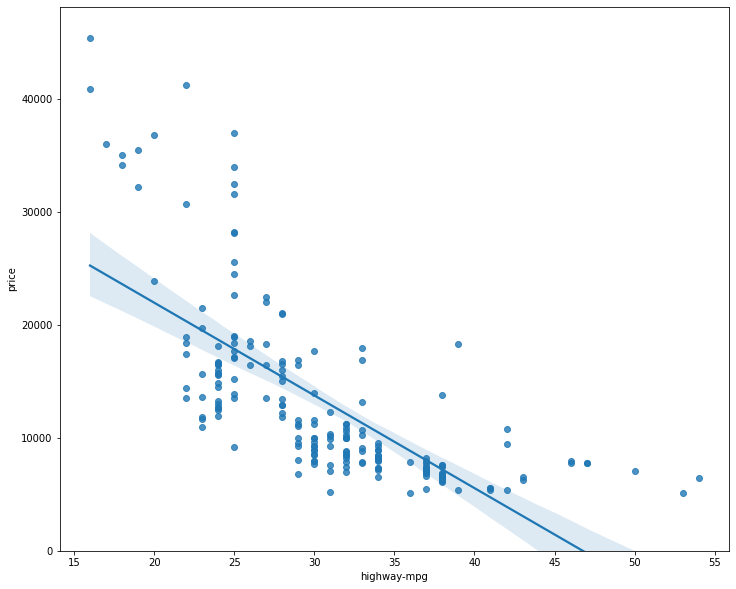

In [28]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<p>Podemos ver en este gráfico que el precio está negativamente correlacionado con el highway-mpg ya que la pendiente de regresión es negativa.

Una cosa a tener en cuenta al mirar un gráfico de regresión es prestar atención a cuán dispersos están los puntos de datos alrededor de la línea de regresión. Esto le dará una buena indicación de la variación de los datos y si un modelo lineal sería el mejor ajuste o no. Si los datos están demasiado alejados de la línea, este modelo lineal podría no ser el mejor modelo para estos datos.

Comparemos este gráfico con el gráfico de regresión de "pico-rpm".</p>


(0.0, 47414.1)

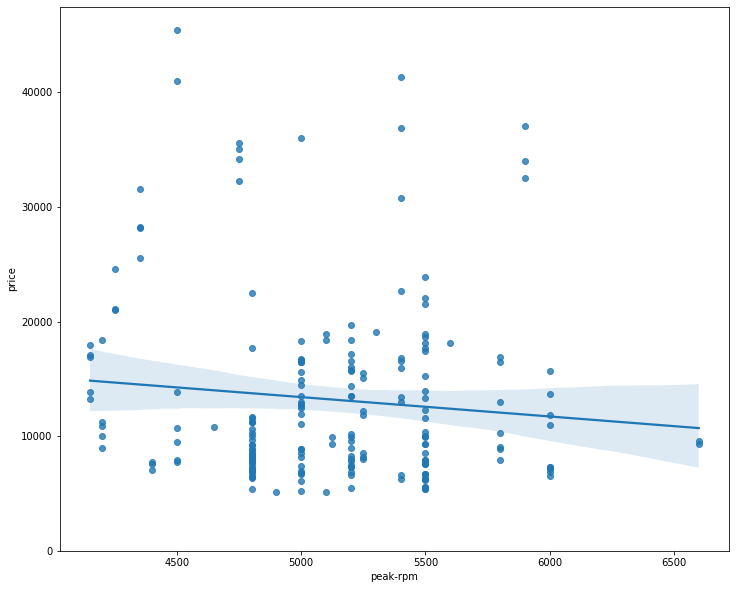

In [29]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>Al comparar el gráfico de regresión de "peak-rpm" y "highway-mpg", vemos que los puntos de "highway-mpg" están mucho más cerca de la línea generada y, en promedio, disminuyen. Los puntos de "peak-rpm" están más dispersos alrededor de la línea predicha y es mucho más difícil determinar si los puntos disminuyen o aumentan a medida que aumenta el "peak-rpm".</p>


#**Pregunta #3:**

<b>Dados los gráficos de regresión anteriores, ¿las "peak-rpm" y "highway-mpg" están más fuertemente correlacionadas con el "precio"? Usa el método ".corr()" para verificar tu respuesta.</b>
</div>


In [30]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


#**Residual Plot**

<p>Una buena manera de visualizar la varianza de los datos es usar un gráfico de residuos.</p>

<p>¿Qué es un <b>residual</b>?</p>

<p>La diferencia entre el valor observado (y) y el valor pronosticado (Yhat) se denomina residual (e). Cuando observamos un gráfico de regresión, el residuo es la distancia desde el punto de datos hasta la línea de regresión ajustada.</p>

<p>Entonces, ¿qué es una <b>parcela residual</b>?</p>

<p>Una gráfica de residuos es un gráfico que muestra los residuos en el eje vertical y y la variable independiente en el eje horizontal x.</p>

<p>¿A qué prestamos atención cuando observamos una parcela residual?</p>

<p>Observamos la dispersión de los residuos:</p>

<p>- Si los puntos en un gráfico residual están <b>distribuidos aleatoriamente alrededor del eje x</b>, entonces un <b>modelo lineal es apropiado</b> para los datos.

¿Porqué es eso? Residuos distribuidos aleatoriamente significa que la varianza es constante y, por lo tanto, el modelo lineal se ajusta bien a estos datos.</p>


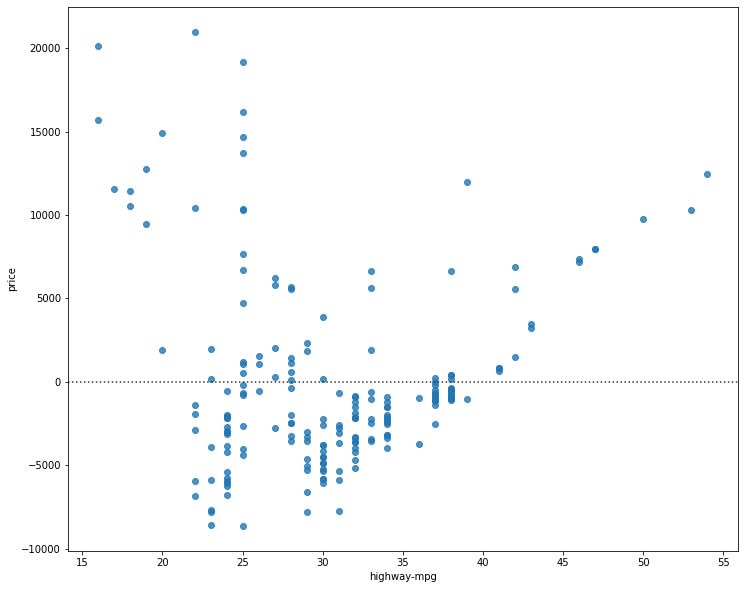

In [31]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

<i>¿Qué nos está diciendo esta trama?</i>

<p>Podemos ver en este gráfico de residuos que los residuos no se distribuyen aleatoriamente alrededor del eje x, lo que nos lleva a creer que tal vez un modelo no lineal sea más apropiado para estos datos.</p>



#**Regresión lineal múltiple**


<p>¿Cómo visualizamos un modelo de regresión lineal múltiple? Esto se vuelve un poco más complicado porque no puede visualizarlo con regresión o gráfico residual.</p>

<p>Una forma de ver el ajuste del modelo es mirar el <b>gráfico de distribución</b>. Podemos observar la distribución de los valores ajustados que resultan del modelo y compararla con la distribución de los valores reales.</p>


Primero, hagamos una predicción:


In [32]:
Y_hat = lm.predict(Z)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


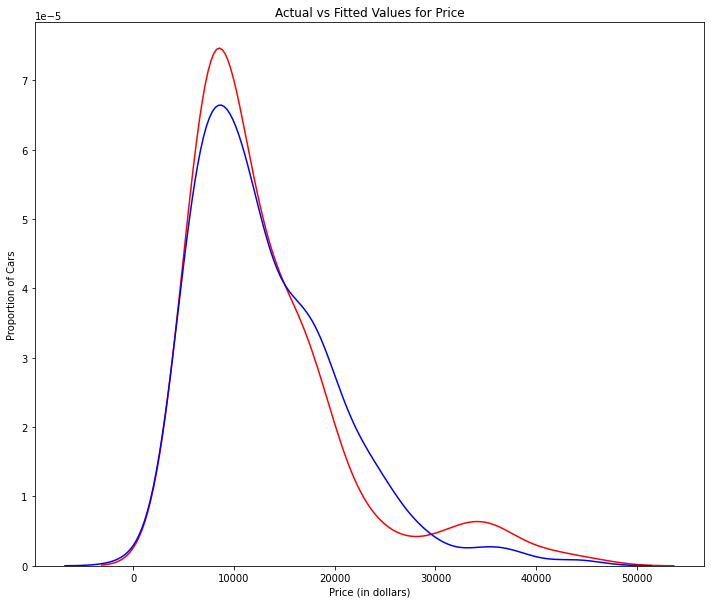

In [33]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>Podemos ver que los valores ajustados están razonablemente cerca de los valores reales ya que las dos distribuciones se superponen un poco. Sin embargo, definitivamente hay margen de mejora.</p>


#**3. Polynomial Regression and Pipelines**


<p><b>La regresión polinomial</b> es un caso particular del modelo de regresión lineal general o de los modelos de regresión lineal múltiple.</p>
<p>Obtenemos relaciones no lineales elevando al cuadrado o estableciendo términos de orden superior de las variables predictoras.</p>

<p>Hay diferentes órdenes de regresión polinomial:</p>


<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\\\
$$

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


<p>Vimos anteriormente que un modelo lineal no proporcionaba el mejor ajuste cuando se usaba "mpg en carretera" como variable de predicción. Veamos si podemos intentar ajustar un modelo polinomial a los datos.</p>

<p>Usaremos la siguiente función para graficar los datos:</p>


In [34]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Obtengamos las variables:


In [35]:
x = df['highway-mpg']
y = df['price']


Ajustemos el polinomio usando la función <b>polyfit</b>, luego usemos la función <b>poly1d</b> para mostrar la función polinomial.


In [36]:
# Aquí usamos un polinomio de tercer orden (cúbico)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Grafiquemos la función:

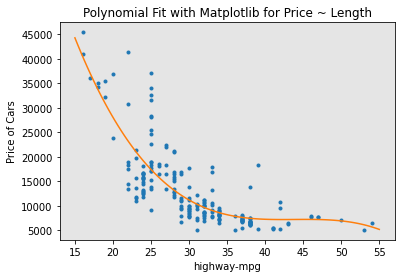

In [37]:
PlotPolly(p, x, y, 'highway-mpg')

In [38]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<p>Ya podemos ver en el gráfico que este modelo polinomial funciona mejor que el modelo lineal. Esto se debe a que la función polinomial generada "golpea" más puntos de datos.</p>

#**Question  #4:**

<b>Cree un modelo polinomial de 11 órdenes con las variables x e y de arriba.</b>
</div>


            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


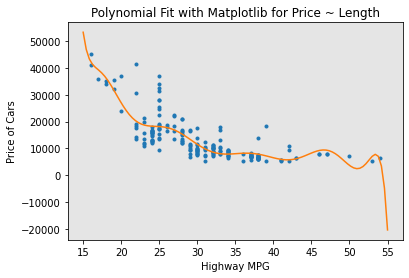

In [39]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')


<p>La expresión analítica para la función polinomial multivariante se complica. Por ejemplo, la expresión de un polinomio de segundo orden (grado=2) con dos variables viene dada por:</p>


$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$


Podemos realizar una transformación polinomial en múltiples características. Primero, importamos el módulo:


In [40]:
from sklearn.preprocessing import PolynomialFeatures


Creamos un objeto <b>PolynomialFeatures</b> de grado 2:


In [41]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [42]:
Z_pr=pr.fit_transform(Z)

En los datos originales, hay 201 muestras y 4 funciones.

In [43]:
Z.shape

(201, 4)

Después de la transformación, hay 201 muestras y 15 funciones.


In [44]:
Z_pr.shape

(201, 15)

<h2>Pipeline</h2>



<p>Las canalizaciones de datos simplifican los pasos para procesar los datos. Usamos el módulo <b>Pipeline</b> para crear un pipeline. También usamos <b>StandardScaler</b> como un paso en nuestra canalización.</p>


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Creamos el pipeline creando una lista de tuplas incluyendo el nombre del modelo o estimador y su constructor correspondiente.


In [49]:
Input=[('scaler', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

Ingresamos la lista como un argumento para el constructor del pipeline:


In [50]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Primero, convertimos el tipo de datos Z al tipo flotante para evitar las advertencias de conversión que pueden aparecer como resultado de que StandardScaler tome entradas flotantes.

Luego, podemos normalizar los datos, realizar una transformación y ajustar el modelo simultáneamente.


In [51]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])


De manera similar, podemos normalizar los datos, realizar una transformación y producir una predicción simultáneamente.


In [52]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

#Pregunta #5:

<b>Cree una canalización que estandarice los datos, luego produzca una predicción usando un modelo de regresión lineal usando las características Z y el objetivo y.</b>
</div>


In [54]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])


#**4. Medidas para la evaluación dentro de la muestra**


<p>Al evaluar nuestros modelos, no solo queremos visualizar los resultados, sino que también queremos una medida cuantitativa para determinar qué tan preciso es el modelo.</p>

<p>Dos medidas muy importantes que se utilizan a menudo en Estadística para determinar la precisión de un modelo son:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<b>R-squared</b>

<p>R al cuadrado, también conocido como coeficiente de determinación, es una medida para indicar qué tan cerca están los datos de la línea de regresión ajustada.</p

<p>El valor de la R-cuadrada es el porcentaje de variación de la variable de respuesta (y) que se explica mediante un modelo lineal.</p>

<b>Mean Squared Error (MSE)</b>

<p>El **Mean Squared Error** mide el promedio de los cuadrados de los errores. Es decir, la diferencia entre el valor real (y) y el valor estimado (ŷ).</p>


#**Modelo 1: Regresión lineal simple**



Calculemos el R^2:


In [55]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176



Podemos decir que \~49.659% de la variación del precio se explica por este modelo lineal simple "horsepower_fit".



**Calculamos la MSE:**


Podemos predecir la salida, es decir, "yhat" usando el método de predicción, donde X es la variable de entrada:

In [56]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


Importemos la función <b>mean_squared_error</b> del módulo <b>metrics</b>:


In [57]:
from sklearn.metrics import mean_squared_error

Podemos comparar los resultados previstos con los resultados reales:


In [58]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888



#**Modelo 2: Regresión lineal múltiple**


Calculamos la R ^ 2:


In [60]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


Podemos decir que \~80.896 % de la variación del precio se explica por esta regresión lineal múltiple "multi_fit".



Calculemos el **MSE**.


Producimos una predicción:


In [61]:
Y_predict_multifit = lm.predict(Z)

Comparamos los resultados previstos con los resultados reales:


In [62]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


#**Model 3: Polynomial Fit**



Calculamos la R ^ 2


Importemos la función <b>r2\_score</b> del módulo <b>metrics</b> ya que estamos usando una función diferente.


In [63]:
from sklearn.metrics import r2_score

Aplicamos la función para obtener el valor de R^2:


In [64]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652



Podemos decir que \~67.419 % de la variación del precio se explica por este ajuste polinomial.


#**MSE**



También podemos calcular el MSE:


In [65]:
mean_squared_error(df['price'], p(x))

20474146.426361218

#**5. Predicción y Toma de Decisiones**

<h3>Predicciones</h3>

<p>En la sección anterior, entrenamos el modelo usando el método <b>fit</b>. Ahora usaremos el método <b>predecir</b> para producir una predicción. Importemos <b>pyplot</b> para trazar; también usaremos algunas funciones de numpy.</p>


In [66]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Crear una nueva entrada:


In [67]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)


Ajuste el modelo:


In [68]:
lm.fit(X, Y)
lm

LinearRegression()


Producir una predicción:


In [69]:
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

Nosotras podemos trazar los datos:


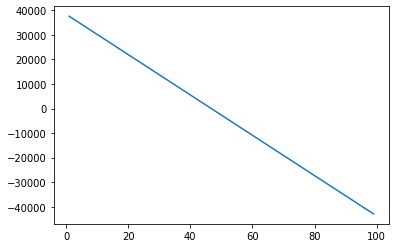

In [70]:
plt.plot(new_input, yhat)
plt.show()

#**Toma de decisiones:**

**Determinación de un buen ajuste del modelo**

<p>Ahora que hemos visualizado los diferentes modelos y generado los valores R-cuadrado y MSE para los ajustes, ¿cómo determinamos un buen ajuste del modelo?
<ul>
    <li><i>¿Cuál es un buen valor R cuadrado?</i></li>
</ul>
</p>

<p>Al comparar modelos, <b>el modelo con el valor R cuadrado más alto se ajusta mejor</b> a los datos.
<ul>
    <li><i>¿Qué es una buena MSE?</i></li>
</ul>
</p>

<p>Al comparar modelos, <b>el modelo con el valor MSE más pequeño se ajusta mejor</b> a los datos.</p>

<h4>Veamos los valores de los diferentes modelos.</h4>
<p>Regresión lineal simple: uso de Highway-mpg como variable predictora del precio.
<ul>
    <li>R-cuadrado: 0,49659118843391759</li>
    <li>MSE: 3,16 x 10^7</li>
</ul>
</p>

<p>Regresión lineal múltiple: uso de la potencia, el peso en orden de marcha, el tamaño del motor y el mpg en carretera como variables predictoras del precio.
<ul>
    <li>R-cuadrado: 0,80896354913783497</li>
    <li>MSE: 1,2 x 10^7</li>
</ul>
</p>

<p>Ajuste polinomial: uso de Highway-mpg como variable predictora del precio.
<ul>
    <li>R-cuadrado: 0,6741946663906514</li>
    <li>MSE: 2,05 x 10^7</li>
</ul>
</p>


#**Modelo de regresión lineal simple (SLR) frente a modelo de regresión lineal múltiple (MLR)**


<p>Por lo general, cuantas más variables tenga, mejor será su modelo para predecir, pero esto no siempre es cierto. En ocasiones, es posible que no tenga suficientes datos, que se encuentre con problemas numéricos o que muchas de las variables no sean útiles e incluso actúen como ruido. Como resultado, siempre debe verificar el MSE y el R^2.</p>

<p>Para comparar los resultados de los modelos MLR y SLR, observamos una combinación de R-squared y MSE para llegar a la mejor conclusión sobre el ajuste del modelo.
<ul>
    <li><b>MSE</b>: el MSE de SLR es 3,16x10^7 mientras que MLR tiene un MSE de 1,2x10^7. El MSE de MLR es mucho más pequeño.</li>
    <li><b>R-squared</b>: En este caso también podemos ver que hay una gran diferencia entre la R-squared de la SLR y la R-squared de la MLR. El R-cuadrado de SLR (~0,497) es muy pequeño en comparación con el R-cuadrado de MLR (~0,809).</li>
</ul>
</p>

Este R-cuadrado en combinación con el MSE muestra que MLR parece ser el mejor ajuste del modelo en este caso en comparación con SLR.


#**Modelo lineal simple (SLR) frente a ajuste polinomial**


<ul>
    <li><b>MSE</b>: podemos ver que Polynomial Fit redujo el MSE, ya que este MSE es más pequeño que el del SLR.</li>
    <li><b>R-cuadrado</b>: el R-cuadrado para Polynomial Fit es mayor que el R-cuadrado para SLR, por lo que Polynomial Fit también aumentó bastante el R-cuadrado.</ li>
</ul>
<p>Dado que el ajuste polinomial resultó en un MSE más bajo y un R-cuadrado más alto, podemos concluir que este fue un modelo de mejor ajuste que la regresión lineal simple para predecir el "precio" con "mpg en carretera" como variable de predicción. </p>


**Regresión lineal múltiple (MLR) frente a ajuste polinomial**


<ul>
    <li><b>MSE</b>: el MSE para MLR es más pequeño que el MSE para Polynomial Fit.</li>
    <li><b>R-cuadrado</b>: el R-cuadrado para el MLR también es mucho mayor que para el ajuste polinomial.</li>
</ul>


#**Conclusiones**


<p>Al comparar estos tres modelos, concluimos que <b>el modelo MLR es el mejor modelo</b> para poder predecir el precio a partir de nuestro conjunto de datos. Este resultado tiene sentido ya que tenemos 27 variables en total y sabemos que más de una de esas variables son predictores potenciales del precio final del automóvil.</p>

## **Bibliografía**

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Mahdi Noorian PhD</a>

- Bahare Talayian

- Eric Xiao

- Steven Dong

- Parizad

- Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.